# Intensity Transformations

In an intensity transformation, the output value of a pixel depends on the input value of that pixel. Not on the neighbours. (Spatial filtering is different from this)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
ASSET_PATH = Path("Images")

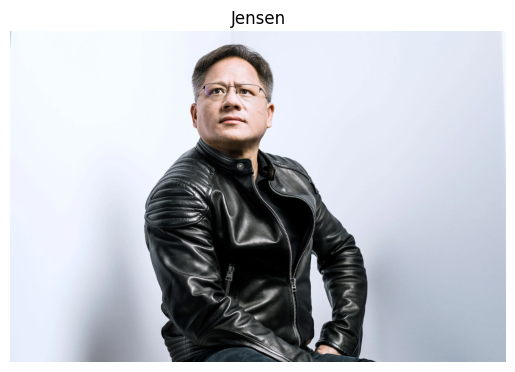

In [3]:
# Read an image and plot it using matplotlib
image_path = ASSET_PATH/"jensen.webp"
try:
    image = cv2.imread(filename = str(image_path), flags = cv2.IMREAD_COLOR) # Alternatively, this can be done for a grayscale image using cv2.IMREAD_GRAYSCALE
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.axis(False)
    plt.title("Jensen")
except Exception as e:
    print(str(e))

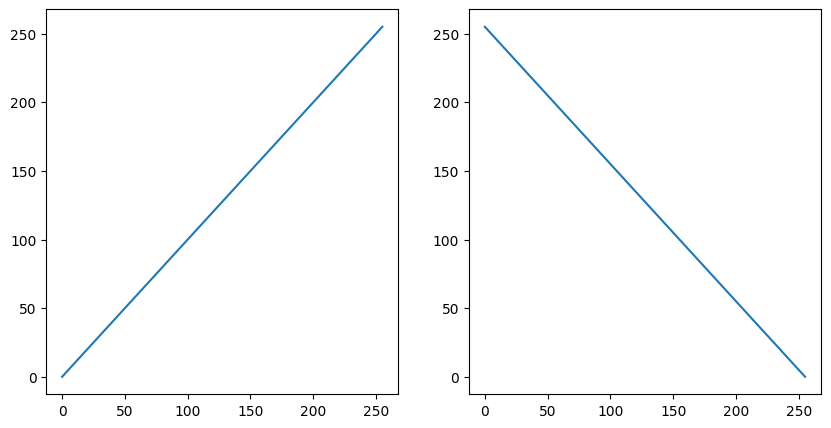

In [4]:
unit_transform = np.arange(start = 0, stop = 256, step = 1, dtype = np.uint8) # No change in the image
negative_transform = np.arange(start = 255, stop = -1, step = -1, dtype = np.uint8) # If dtype is not specified and integers are used, it will be int32. Issue will arise when plotting as cvtColor expects uint8, uint16 or float32
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(unit_transform)
axes[1].plot(negative_transform)
plt.show()

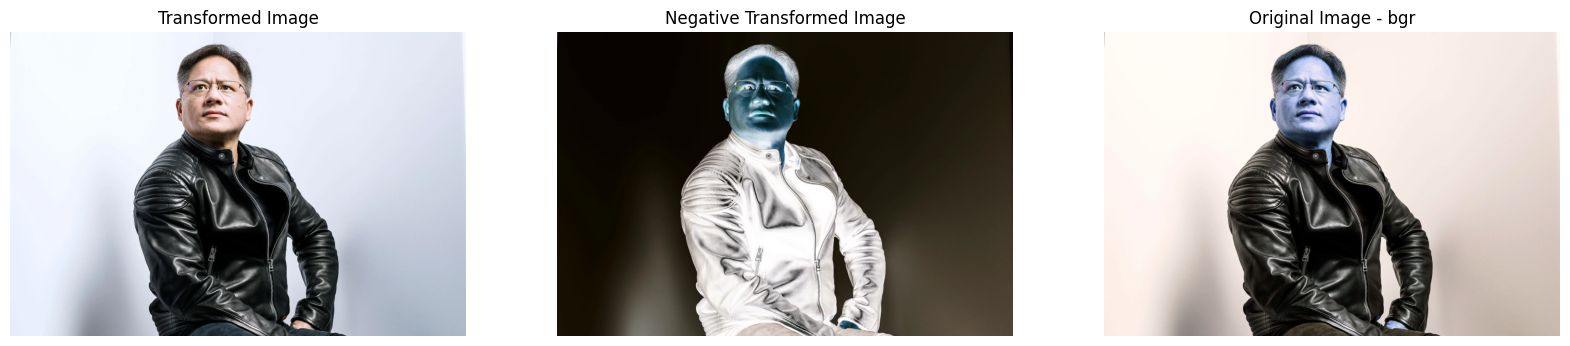

In [5]:
transformed_image = cv2.LUT(image, unit_transform)
negative_transformed_image = cv2.LUT(image, negative_transform)
negative_transformed_image = negative_transform[image] # This is also possible. For each pixel, we index the pixel value in the negative_transform array
rgb_transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) # This is a simple linear transformation. Here we are using the unitary transform
rgb_negative_transformed_image = cv2.cvtColor(negative_transformed_image, cv2.COLOR_BGR2RGB) # This is a simple linear transformation. Here we are using the negative transform for each color channel
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axes[0].imshow(rgb_transformed_image)
axes[0].set_title('Transformed Image')
axes[0].axis('off')
axes[1].imshow(rgb_negative_transformed_image)
axes[1].set_title('Negative Transformed Image')
axes[1].axis('off')
axes[2].imshow(image)
axes[2].set_title('Original Image - bgr') # BGR
axes[2].axis('off')
plt.show()

Transforms can be used to gain insights from an image when the original image is not easy to understand. For example, in the below cell where we  have a dark image of a breast cancer cell, we can use intensity transformations to make the image more clear.

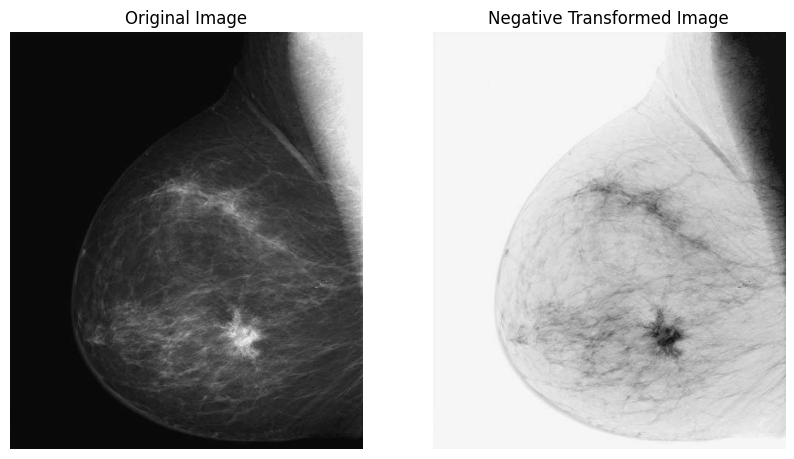

In [6]:
breast_cancer_image_path = ASSET_PATH/"Fig0304(a)(breast_digital_Xray).tif"
breast_cancer_image = cv2.imread(str(breast_cancer_image_path), cv2.IMREAD_GRAYSCALE)
breast_cancer_negative_transform = cv2.LUT(src = breast_cancer_image, lut = negative_transform)
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))
axes[0].imshow(breast_cancer_image, cmap = "gray")
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(breast_cancer_negative_transform, cmap = "gray")
axes[1].set_title("Negative Transformed Image")
axes[1].axis("off")
plt.show()

### Gamma correction

Gamma correction is used to enhance certain parts of the image. It is done to adjust for the non linearity of the display. In practice it is used to adjust the image for a display.
The equation for a gamma correction is given by: 
$$ g = f ^ \gamma $$
This might cause the image to be too bright or too dark. To fix this, we can use the following equation: $$ g = \left(\frac{f}{f_{max}}\right) ^ \gamma * f_{max} $$ where $f_{max}$ is the maximum value of the input.

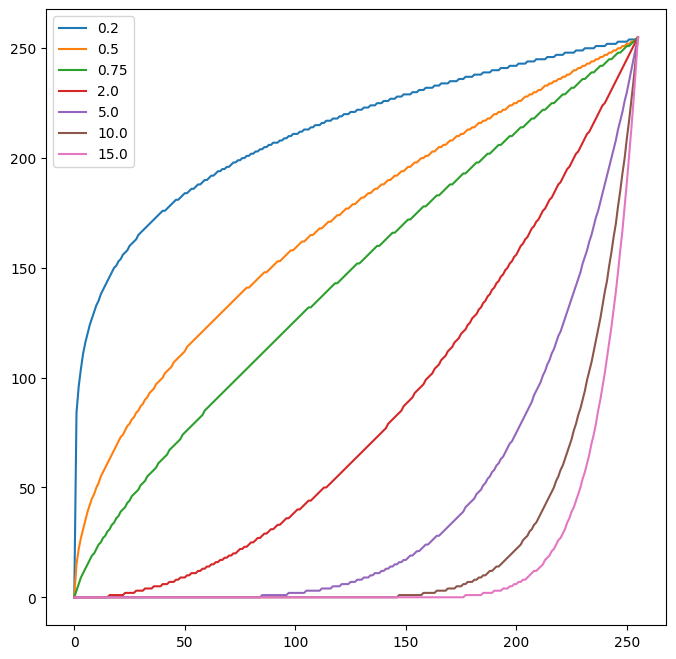

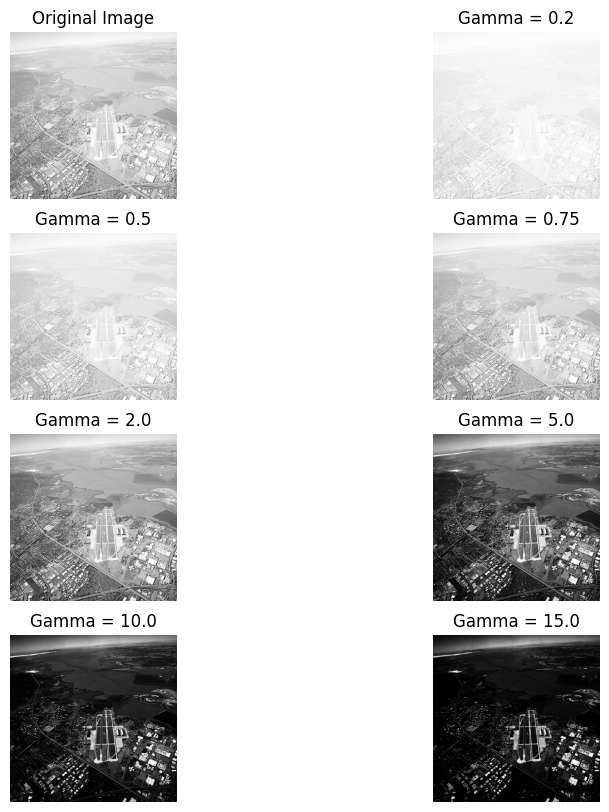

In [7]:
image_path = ASSET_PATH/"city.tif"
image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
gamma_array = [0.2,0.5,0.75,2.0,5.0,10.0,15.0]
gammafig, gammaaxes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
axes[0,0].imshow(image, cmap = 'gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')
for i,gamma in enumerate(gamma_array):
    gamma_transform = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0,256)], dtype = np.uint8)
    gammaaxes.plot(gamma_transform)
    gammaaxes.legend(gamma_array)
    gamma_transformed_image = cv2.LUT(image, gamma_transform)
    row, col = divmod(i+1, 2)
    axes[row, col].imshow(cv2.cvtColor(gamma_transformed_image, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'Gamma = {gamma}')
    axes[row, col].axis('off')
plt.show()

As shown above, a low gama means that a small range of low brightness pixels are mapped to a large range of output values. This means that the image will be brighter. Additionally, there is an increase in detail in the low brightness regions. When gamma is high, a small range of bright pixels are mapped to a large range of output values and hence there will be more detail in the high brightness areas and the image is darker and the details in the high brightness regions are increased.

### Intensity Windowing

Intensity windowing, also known as contrast streching, is a simple image enhancement technique used to improve the contrast in an image. It operates by mapping the intensity values of the original image from a specific range to a new, wider, and more desirable range of values, typically to utilize the full range of the display device (e.g., 0 to 255 for an 8-bit image). This linear transformation enhances the visibility of details in the image by spreading out the most common intensity values.

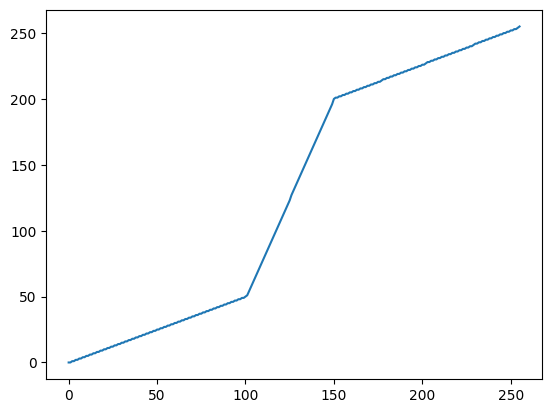

In [8]:
c = np.array([(100, 50), (150, 200)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
plt.plot(transform)
plt.show()


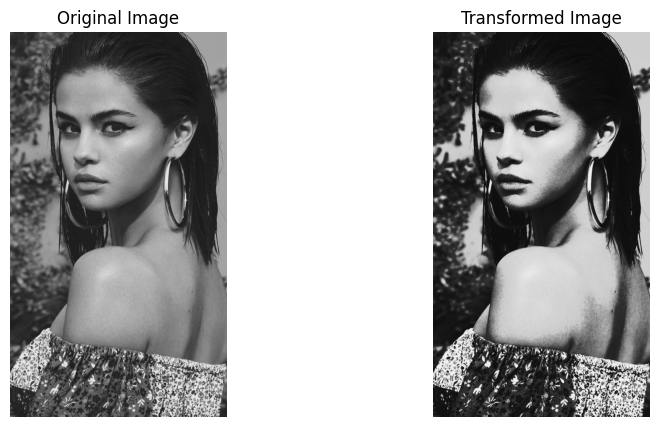

In [9]:
img_orig = cv2.imread(str(ASSET_PATH/"selena.jpg"), cv2.IMREAD_GRAYSCALE)
image_transformed = cv2.LUT(img_orig, transform)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Transformed Image')
axes[1].axis('off')
plt.show()
# As seen from the below example, applying such a transformation increases the detail in the mid regions but decreases the detail in the high intensity regions. 
# This is because the slope of the transformation is higher in the mid regions and lower in the high and low intensity regions. This is a non-linear transformation.

### Splitting into channels - RGB

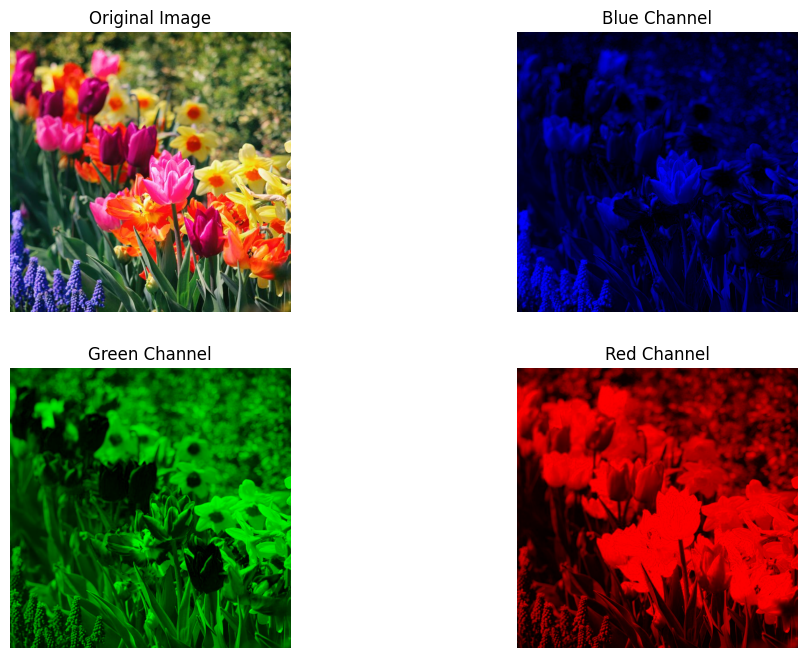

In [10]:
im = cv2.imread(str(ASSET_PATH/"flowers.jpg"))
b,g,r = cv2.split(im)
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0,0].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image")
ax[0,0].axis("off")
ax[0,1].imshow(cv2.merge((np.zeros_like(r), np.zeros_like(g), b)))
ax[0,1].set_title("Blue Channel")
ax[0,1].axis("off")
ax[1,0].imshow(cv2.merge((np.zeros_like(r), g, np.zeros_like(b))))
ax[1,0].set_title("Green Channel")
ax[1,0].axis("off")
ax[1,1].imshow(cv2.merge((r, np.zeros_like(g), np.zeros_like(b))))
ax[1,1].set_title("Red Channel")
ax[1,1].axis("off")
plt.show()

### Splitting into channels - HSV

HSV is another way of representing images. Hue represents the colour itself. 0 - 120 is red, 120 - 240 is green and 240 - 360 is blue. Saturation represents the purity of the colour. Higher the saturation, the more pure the colour is. A saturation of 0 is gray while a saturation of 100 is the pure colour. Value represents the brightness of the colour. Higher the value, the brighter the colour is. 0 is black and 100 is white.

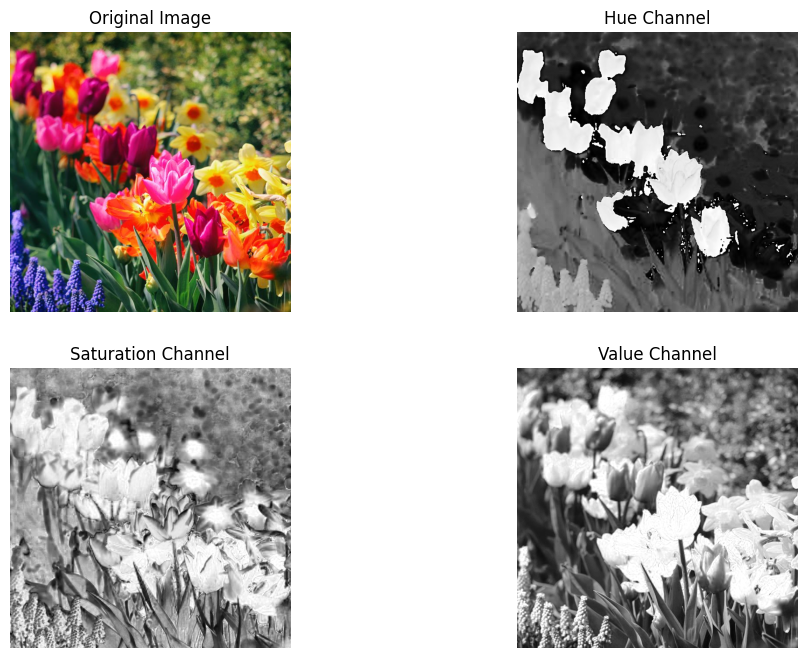

In [11]:
im = cv2.imread(str(ASSET_PATH/"flowers.jpg"))
im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(im)
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0,0].imshow(cv2.cvtColor(im, cv2.COLOR_HSV2RGB))
ax[0,0].set_title("Original Image")
ax[0,0].axis("off")
ax[0,1].imshow(h, cmap = "gray")
ax[0,1].set_title("Hue Channel")
ax[0,1].axis("off")
ax[1,0].imshow(s, cmap = "gray")
ax[1,0].set_title("Saturation Channel")
ax[1,0].axis("off")
ax[1,1].imshow(v, cmap = "gray")
ax[1,1].set_title("Value Channel")
ax[1,1].axis("off")
plt.show()

### Segmenting an image

An image can be segmented as needed. This can be done by thresholding the image. This is done by setting a threshold value and then setting all the pixels below that value to 0 and all the pixels above that value to 1. This can be used to segment the image into different parts.

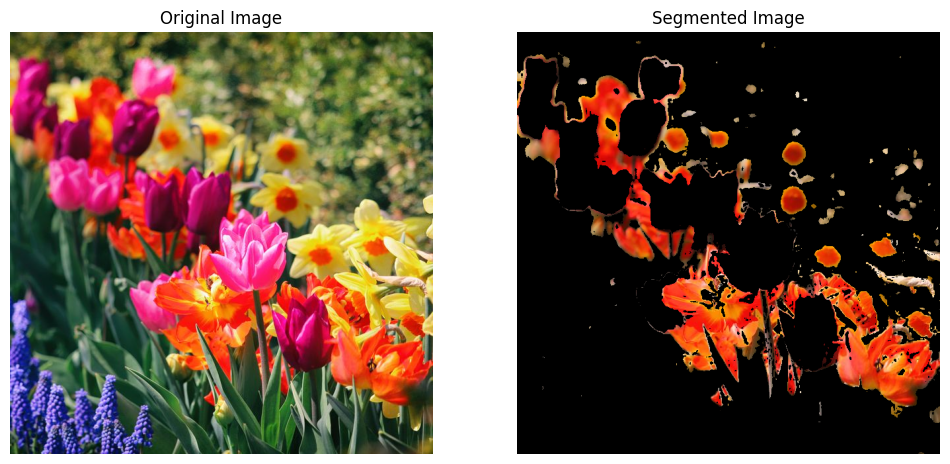

In [12]:
im = cv2.imread(str(ASSET_PATH/"flowers.jpg"))
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(im_hsv, (0, 0, 0), (20, 255, 255)) # Only select hue between 0 and 120 and saturation and value between 0 and 255. In essence, this splits based solely on hue
im_segmented = cv2.bitwise_and(im, im, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(im_segmented, cv2.COLOR_BGR2RGB))
ax[1].set_title('Segmented Image')
for a in ax:
    a.axis('off')
plt.show()

### Histograms

* We can represent the intensity distribution over the range of intensities [0, 255], using a histogram.
* If $h$ is the histogram of a particular image, $h(r_k)$ gives us how many pixels have the intensity $𝑟_𝑘$. 
* The histogram of a digital image with gray values in the range [0, 𝐿 − 1] is a discrete function $ℎ(𝑟_𝑘) = 𝑛_𝑘$  where $𝑟_𝑘$  is the $k^{th}$ gray level and $𝑛_𝑘$ is the number of pixels having gray level $𝑟_𝑘$.
* We can normalize the histogram by dividing by the total number of pixels $n$. Then we have an estimate of the probability of occurrence of level $𝑟_𝑘$  , i.e., $𝑝(𝑟_𝑘) =𝑛_𝑘/𝑛$.
* The histogram that we described above has 𝐿 bins. We can construct a coarser histogram by selecting a smaller number of bins than $L$. Then several adjacent values of $𝑘$ will be counted for a bin.


A histogram will give us an idea of the distribution of intensities in an image. We can use this information to apply intensity transformations to the image. For example, if the histogram is skewed to the left, we can apply a transformation to increase the intensity of the pixels. If the histogram is skewed to the right, we can apply a transformation to decrease the intensity of the pixels. People prefer a flat histogram. We can use histogram equalization to achieve this. The equation can be given as:

$$s_k = T(r_k) = \frac{L-1}{MN}\sum_{j=0}^{k} n_j$$

where $s$ is the new intensity value, $L$ is the total number of intensity levels, $M$ is the number of rows in the image, $N$ is the number of columns in the image, $n_j$ is the number of pixels with intensity $r_j$ and $k$ is the intensity level ranging from 0 to $L-1$.

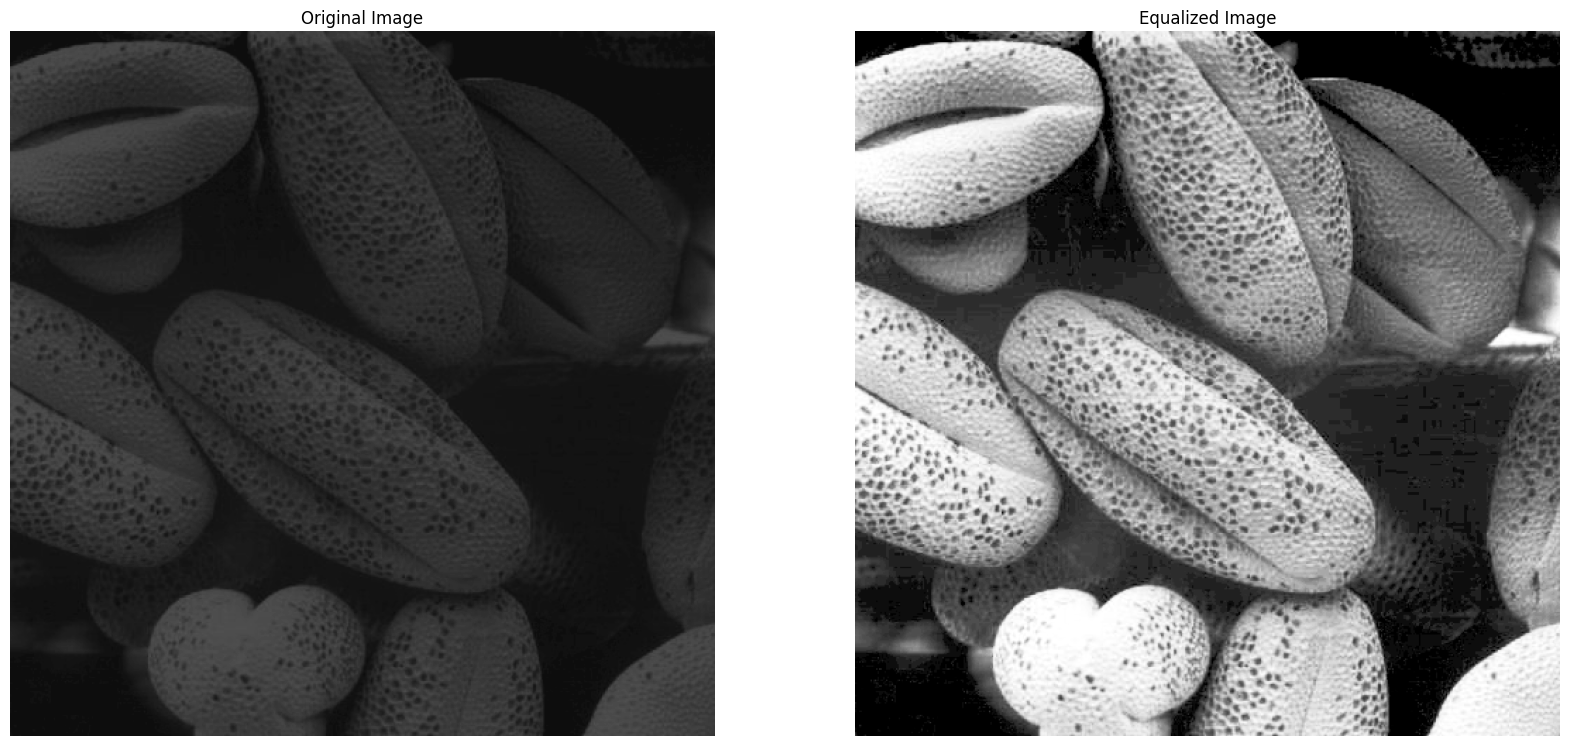

In [13]:
try:
    image = cv2.imread(str(ASSET_PATH/"shells.tif"))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    equalized_image = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title('Equalized Image')
    axes[1].axis('off')
    plt.show()
except Exception as e:
    print(str(e))
# By setting vmin=0 and vmax=255, the code ensures that the grayscale image is displayed with a full range of intensities from black (0) to white (255), 
# mapping the entire range of 8-bit grayscale values directly to the colormap without any scaling or normalization.

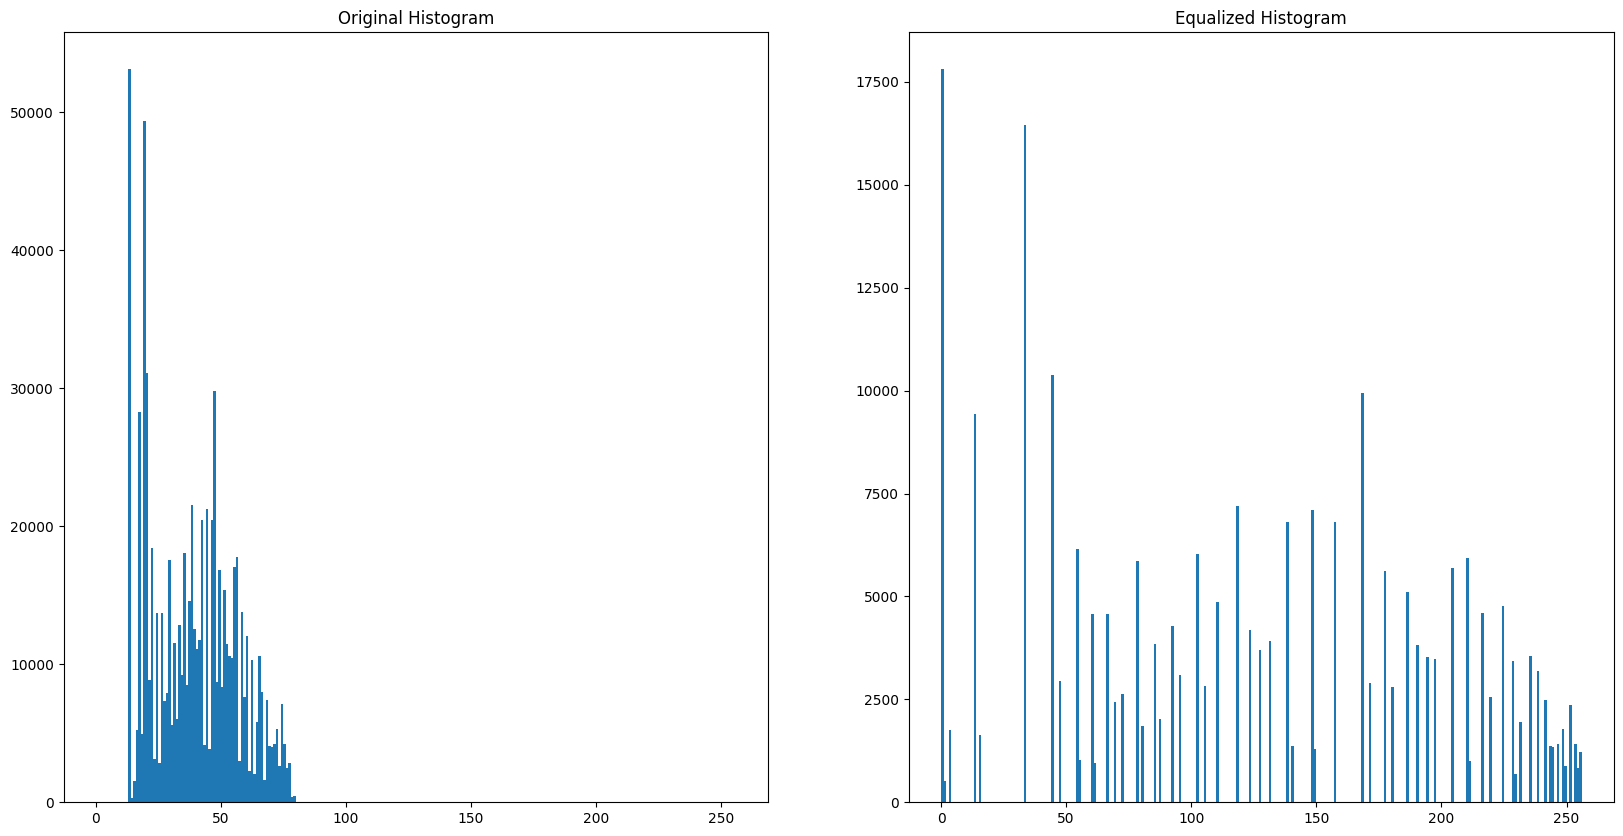

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(image.ravel(),256,[0,256]) # ravel() flattens the image
axes[0].set_title('Original Histogram')
axes[1].hist(equalized_image.ravel(),256,[0,256])
axes[1].set_title('Equalized Histogram')
plt.show()

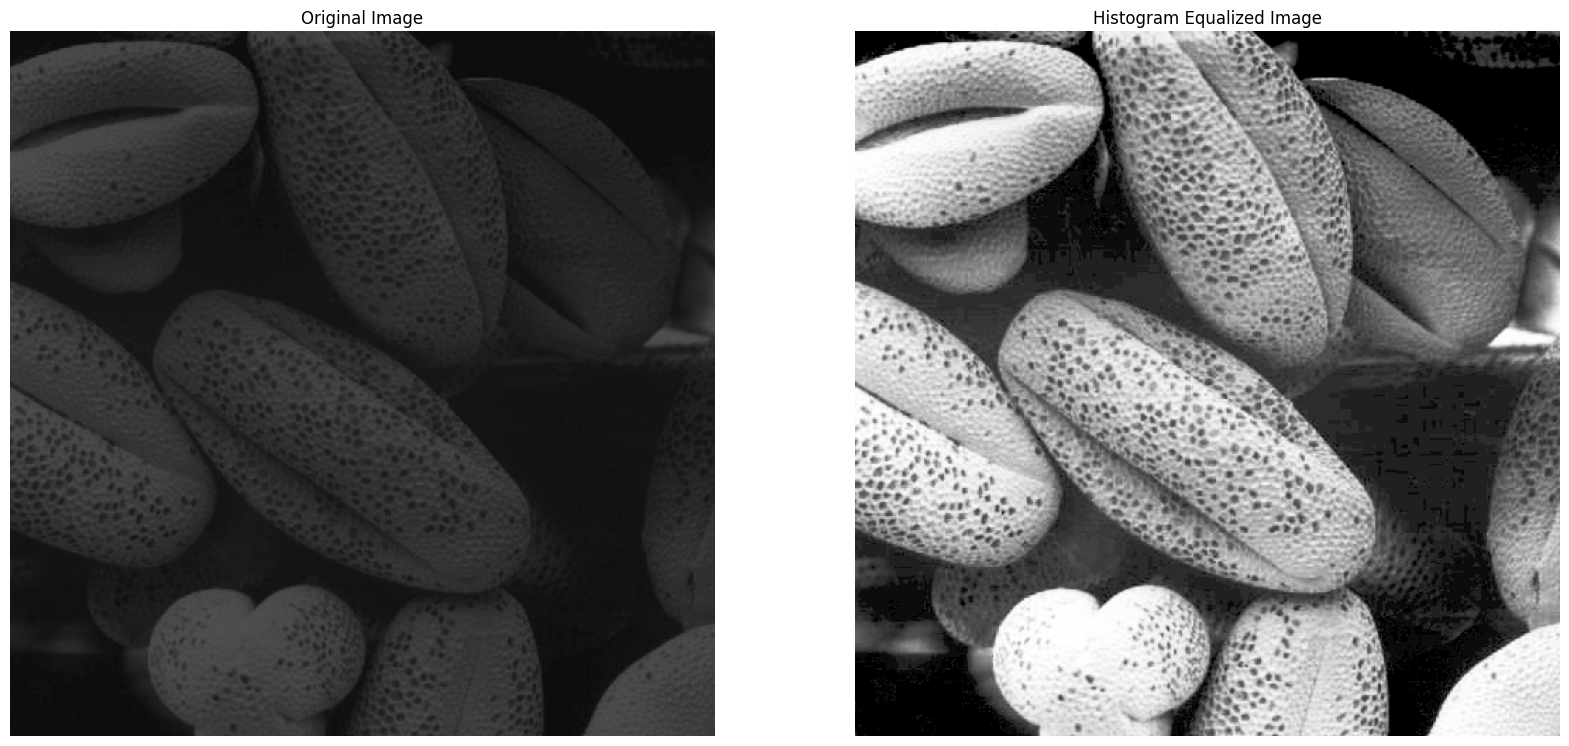

In [15]:
try:
    image = cv2.imread(str(ASSET_PATH/"shells.tif"), cv2.IMREAD_GRAYSCALE)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    M , N = image.shape
    h = cv2.calcHist([image],[0],None,[256],[0,256])
    cdf = np.cumsum(h) # Cumulative Distribution Function
    L = 256
    t = np.uint((L - 1) * cdf / (M * N))
    g = t[image]
    axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(g, cmap='gray')
    axes[1].set_title('Histogram Equalized Image')
    axes[1].axis('off')
    plt.show()
except Exception as e:
    print(str(e))